<a href="https://colab.research.google.com/github/oreomcflurryyy/statistical-learning-unsupervisedlearning/blob/main/unsupervisedlearning_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In this problem, you will generate simulated data, and then perform
PCA and K-means clustering on the data.

(a) Generate a simulated data set with 20 observations in each of three classes (i.e., 60 observations total), and 50 variables.

*Hint:* Use functions like `normal()` or `uniform()` from NumPy to generate data. Add a mean shift to the observations in each class to create three distinct classes.

In [12]:
np.random.seed(0)
class1 = np.random.normal(loc=0, scale=1, size=(20, 50))
class2 = np.random.normal(loc=3, scale=1, size=(20, 50))
class3 = np.random.normal(loc=6, scale=1, size=(20, 50))

X = np.vstack([class1, class2, class3])
true_labels = np.array([0]*20 + [1]*20 + [2]*20)

(b) Perform PCA on the 60 observations and plot the first two principal component score vectors. Use different colors to indicate the observations in each of the three classes. Ensure the classes show separation in the plot before proceeding to part (c).

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_pca = PCA()
X_scores = X_pca.fit_transform(X_scaled)

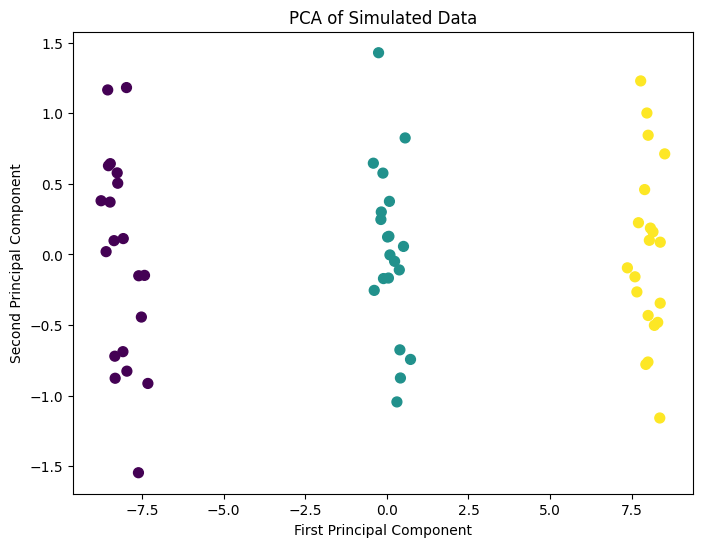

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(X_scores[:, 0], X_scores[:, 1], c=true_labels, s=50)
plt.title('PCA of Simulated Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

(c) Perform K-means clustering with K=3. Compare the clusters obtained to the true class labels.

*Hint:* Use `pd.crosstab()` to compare true class labels with clustering labels. Remember that K-means labels are arbitrary.


In [30]:
kmeans = KMeans(n_clusters=3,
                random_state=2).fit(X)
kmeans.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [31]:
comparison = pd.crosstab(true_labels, kmeans.labels_, rownames=['True'], colnames=['K-means'])
print(comparison)

K-means   0   1   2
True               
0         0   0  20
1        20   0   0
2         0  20   0


(d) Perform K-means clustering with K=2. Describe your results.

In [33]:
kmeans_2 = KMeans(n_clusters=2, random_state=2).fit(X)
comparison_2 = pd.crosstab(true_labels, kmeans_2.labels_, rownames=['True'], colnames=['K-means'])
print(comparison_2)

K-means   0   1
True           
0        20   0
1        20   0
2         0  20


(e) Perform K-means clustering with K=*4*. Describe your results.

In [34]:
kmeans_4 = KMeans(n_clusters=4, random_state=2).fit(X)
comparison_4 = pd.crosstab(true_labels, kmeans_4.labels_, rownames=['True'], colnames=['K-means'])
print(comparison_4)

K-means   0   1  2   3
True                  
0         0   0  7  13
1        20   0  0   0
2         0  20  0   0


(f) Perform K-means clustering with K=3 on the first two principal component score vectors. Comment on the results.


In [39]:
kmeans_pca = KMeans(n_clusters=3, random_state=2).fit(X_scores[:,:2])

comparison_pca = pd.crosstab(true_labels, kmeans_pca.labels_, rownames=['True'], colnames=['K-means'])
print(comparison_pca)

K-means   0   1   2
True               
0         0   0  20
1        20   0   0
2         0  20   0


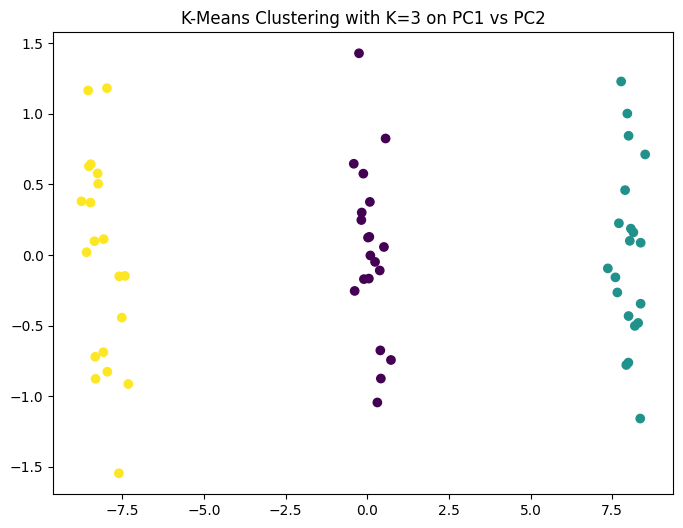

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(X_scores[:,0], X_scores[:,1], c=kmeans_pca.labels_)
ax.set_title("K-Means Clustering with K=3 on PC1 vs PC2");

* Effect of Scaling: Scaling ensures that each variable contributes equally to the distance calculations, which can lead to different clustering results.

* PCA vs. Raw Data: Clustering on PCA-transformed data can sometimes yield better separation if the first few components capture most of the variance.

* K=2 and K=4: These settings explore how the algorithm behaves with fewer or more clusters than the true number.